In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [14]:
processed_data = pd.read_csv("../data/monthly_data.csv")

In [15]:
processed_data.head()

,timestamp,all_motor_vehicles
0,2000-03-01,4079983.0
1,2000-04-01,11856901.0
2,2000-05-01,9222997.0
3,2000-06-01,8759275.0
4,2000-07-01,10122191.0


In [16]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           285 non-null    object 
 1   all_motor_vehicles  285 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [17]:

processed_data['timestamp'] = pd.to_datetime(processed_data['timestamp'])

In [18]:
processed_data.dtypes

timestamp             datetime64[ns]
all_motor_vehicles           float64
dtype: object

In [19]:
monthly_data_zeros = processed_data.loc[processed_data["all_motor_vehicles"] == 0]
monthly_data_zeros.groupby(processed_data["timestamp"].dt.month).size()

Series([], dtype: int64)

**Notes**
- The output suggests that in:

    - January (Month 1), there are 23 occurrences where the traffic count (all_motor_vehicles) was 0.
    - February (Month 2), there are 23 occurrences of 0.
    - March (Month 3), there are only 2 occurrences of 0.
    - August (Month 8), 23 occurrences.
    - November (Month 11), 15 occurrences.
    - December (Month 12), 23 occurrences.

In [20]:
zero_counts = processed_data["all_motor_vehicles"].value_counts().get(0, 0)
print(f"Total records with zero motor vehicles: {zero_counts}")

Total records with zero motor vehicles: 0


In [21]:
total_records = len(processed_data)
zero_proportion = zero_counts / total_records * 100
print(f"Percentage of records with zero motor vehicles: {zero_proportion:.2f}%")

Percentage of records with zero motor vehicles: 0.00%


In [22]:
processed_data['timestamp']

0     2000-03-01
1     2000-04-01
2     2000-05-01
3     2000-06-01
4     2000-07-01
         ...    
280   2023-07-01
281   2023-08-01
282   2023-09-01
283   2023-10-01
284   2023-11-01
Name: timestamp, Length: 285, dtype: datetime64[ns]

In [23]:
# Replace 0s with NaN if necessary
processed_data["all_motor_vehicles"].replace(0, np.nan, inplace=True)

In [ ]:

monthly_zero_counts = monthly_data_zeros.groupby(processed_data["timestamp"].dt.month).size()

# Plot the counts of zero values per month
plt.figure(figsize=(10, 6))
monthly_zero_counts.plot(kind='bar', color='purple')
plt.title('Number of Zero Traffic Values by Month')
plt.xlabel('Month')
plt.ylabel('Count of Zeros')
plt.xticks(rotation=0)
plt.show()

In [25]:
processed_data.head()

,timestamp,all_motor_vehicles
0,2000-03-01,4079983.0
1,2000-04-01,11856901.0
2,2000-05-01,9222997.0
3,2000-06-01,8759275.0
4,2000-07-01,10122191.0


In [16]:
# Interpolate missing values
# processed_data["all_motor_vehicles"].interpolate(method='linear', inplace=True)

In [26]:
processed_data.sample(20)

,timestamp,all_motor_vehicles
145,2012-04-01,6404030.0
197,2016-08-01,5001912.0
84,2007-03-01,4602061.0
5,2000-08-01,9359520.0
254,2021-05-01,7347240.0
244,2020-07-01,6428484.0
63,2005-06-01,5857292.0
138,2011-09-01,7405172.0
123,2010-06-01,10726188.0
87,2007-06-01,6228098.0


In [27]:
processed_data.to_csv("../data/processed_1_data_monthly.csv")

## Scaling/Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
processed_data["all_motor_vehicles_scaled"] = scaler.fit_transform(processed_data[["all_motor_vehicles"]])
print(processed_data.head())


   timestamp  all_motor_vehicles  all_motor_vehicles_scaled
0 2000-03-01           4079983.0                   0.143257
1 2000-04-01          11856901.0                   0.416770
2 2000-05-01           9222997.0                   0.324136
3 2000-06-01           8759275.0                   0.307827
4 2000-07-01          10122191.0                   0.355760


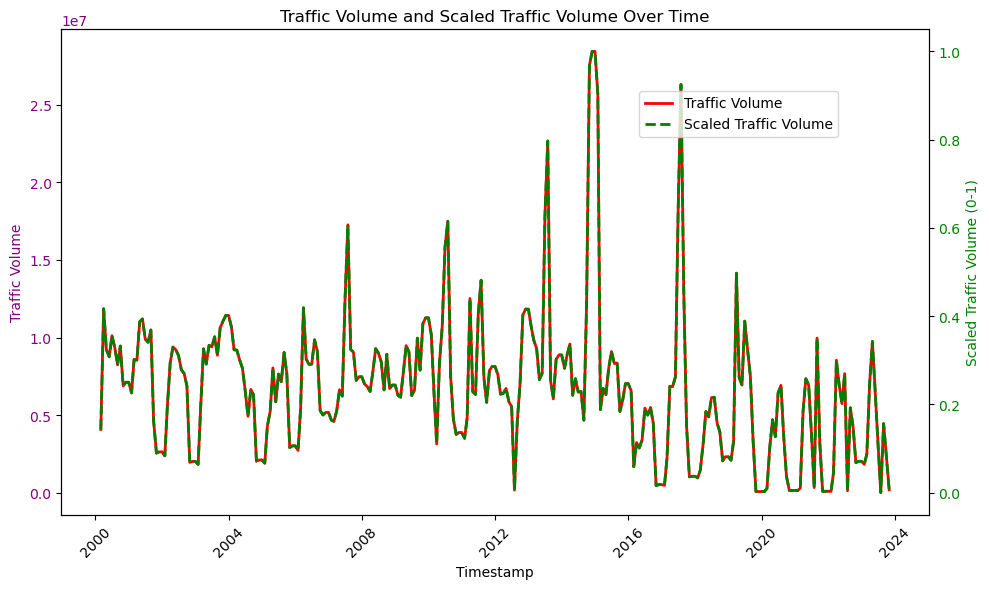

In [29]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the original traffic volume on the first axis
ax1.plot(processed_data['timestamp'], processed_data['all_motor_vehicles'], label='Traffic Volume', color='red', linewidth=2)
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Traffic Volume', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title('Traffic Volume and Scaled Traffic Volume Over Time')
plt.xticks(rotation=45)


ax2 = ax1.twinx()  
ax2.plot(processed_data['timestamp'], processed_data['all_motor_vehicles_scaled'], label='Scaled Traffic Volume', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Scaled Traffic Volume (0-1)', color='green')
ax2.tick_params(axis='y', labelcolor='green')


fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

plt.show()


In [30]:
processed_data['traffic_ma_7'] = processed_data['all_motor_vehicles'].rolling(window=7).mean()  # 7-day moving average

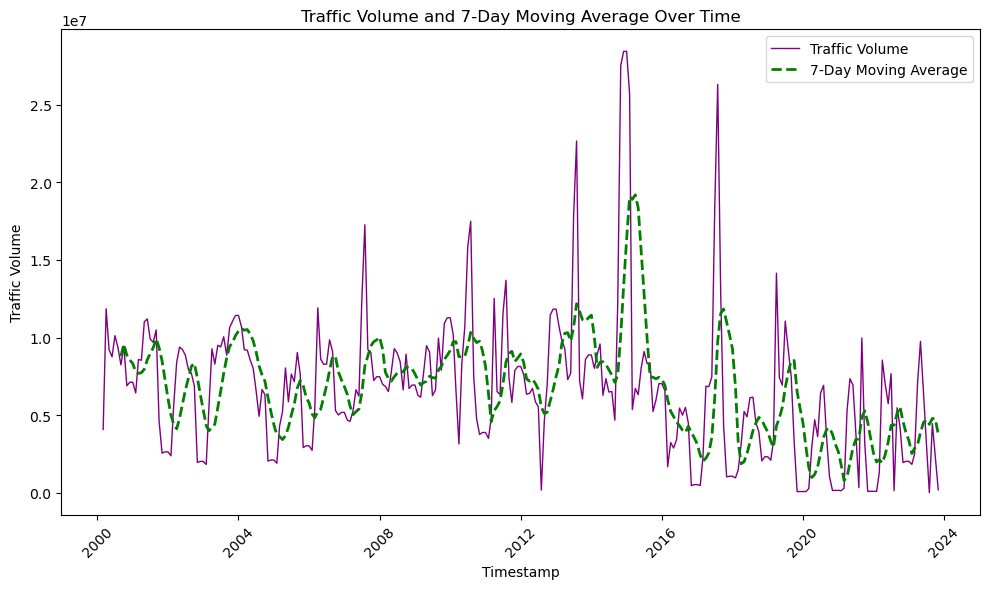

In [31]:

# Create a 7-day moving average of 'all_motor_vehicles'
processed_data['traffic_ma_7'] = processed_data['all_motor_vehicles'].rolling(window=7).mean()


plt.figure(figsize=(10, 6))

# Plot original traffic data
plt.plot(processed_data['timestamp'], processed_data['all_motor_vehicles'], label='Traffic Volume', color='purple', linewidth=1)

# Plot 7-day moving average
plt.plot(processed_data['timestamp'], processed_data['traffic_ma_7'], label='7-Day Moving Average', color='green', linestyle='--', linewidth=2)

plt.title('Traffic Volume and 7-Day Moving Average Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


In [33]:
processed_data.head()

,timestamp,all_motor_vehicles,all_motor_vehicles_scaled,traffic_ma_7
0,2000-03-01,4079983.0,0.143257,NaN
1,2000-04-01,11856901.0,0.416770,NaN
2,2000-05-01,9222997.0,0.324136,NaN
3,2000-06-01,8759275.0,0.307827,NaN
4,2000-07-01,10122191.0,0.355760,NaN


In [34]:
processed_data.shape

(285, 4)

In [35]:
processed_data.to_csv("../data/scaled_processed_data_monthly.csv")